<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB
                 Model  Accuracy
2        Random Forest  0.987194
0  Logistic Regression  0.982183
1          Naive Bayes  0.932405


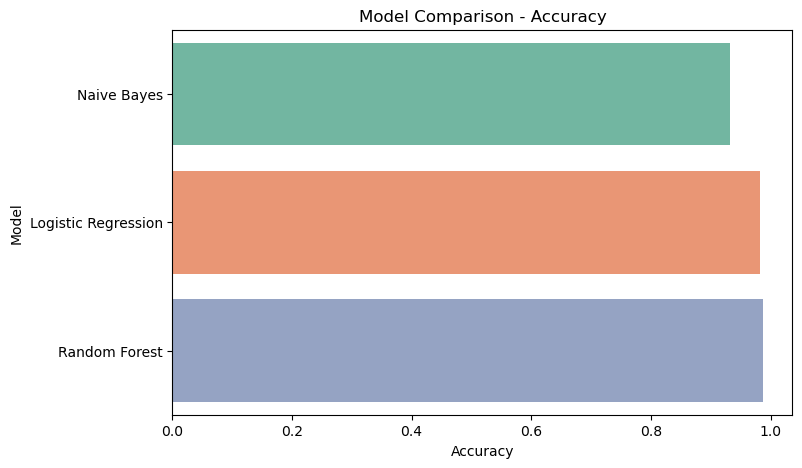

Confusion Matrix:
 [[4642   68]
 [  50 4220]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4710
           1       0.98      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Load and Combine Datasets
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

# Add Labels
fake['label'] = 0  # Fake = 0
true['label'] = 1  # Real = 1

# Combine and Shuffle
df = pd.concat([fake, true], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Drop Unused Columns
df.drop(['title', 'subject', 'date'], axis=1, inplace=True, errors='ignore')

# Check Data
df.info()
df.head()

# Features and Target
X = df['text']
y = df['label']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_vect = vectorizer.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

# Model Training & Comparison
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier()
}
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))

# Accuracy Results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
print(results_df.sort_values("Accuracy", ascending=False))

# Visual Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x="Accuracy", y="Model", data=results_df.sort_values("Accuracy"), palette="Set2")
plt.title("Model Comparison - Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()

# Final Best Model: Random Forest
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
final_preds = best_model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, final_preds))
print("\nClassification Report:\n", classification_report(y_test, final_preds))
